# Statistical analasys of diamond dataset

## idea

- price comparissons regression etc vs cut or clarity, gör en prediktionsmodell för pris mot ngn av dom andra värdena eller korrelation

- jämför störst korrelation på pris av karat mot storlek

- ngn form av stickprovs undersökning hur säker den e, medelfel etc. varians eller standardavikelse på stickprovet för carat

- hypotetstest populationsmedelvärde eller populationsvariansen för 2 olika typer kanske färger


- **kolla korrelation mellan pris och carat, ols prediction model, corr heatmap kolla R^2 värdet, gör ytterligare fördelning på clarity för bättre prediction**

In [48]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# load and gives a quick view into what the dataset looks like
df = pd.read_csv("assets/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Start by exploring the dataset to determine what values exist in the different columns

In [49]:
# prints the different types of values in all the non-numerical columns 
print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

# gives information on the data in the numerical columns such as mean and min/max
df.describe()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Using correlation test to see if there are any significant correlations between the columns primarily looking at price since thats what i want to explore. Im using the absolute values so that correlation will range from 0-1 with closer to 1 being higher correlation. Since its the absolute value it wont show if its a positive or negative correlation so that would need to be analysed further later on. 

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_6156\2140611584.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,0.295779,0.010647,0.025289,0.029341,0.094924
table,0.181618,0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


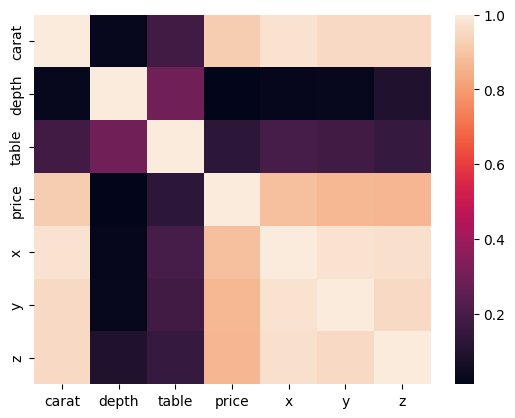

In [51]:
# makes a correlation dataframe between numerical value columns 
corr = df.corr()

# prints a heatmap of the correlation between columns. Using abs to turn negative correlation into positive.
sns.heatmap(abs(corr))
abs(corr)

There is a clear and high correlation between price and carot which will be the continued focus of this report. Another note from this information that i faild to think about before is the correlation between carat and x,y,z. Carat is a weight unit and x, y and z are all size mesurments of different types, so ofcourse the size of the diamonds is correlated to its wieght. However this correlation is not of interest for my analysis.

## regression

Continuing with this information I want to further explore the correlation between carat and price. By creating a regression model to visulise the correlation between them. The scatterpoints will show if there are any outliers and the prediction will show if the dataset fits a linear regression model. 

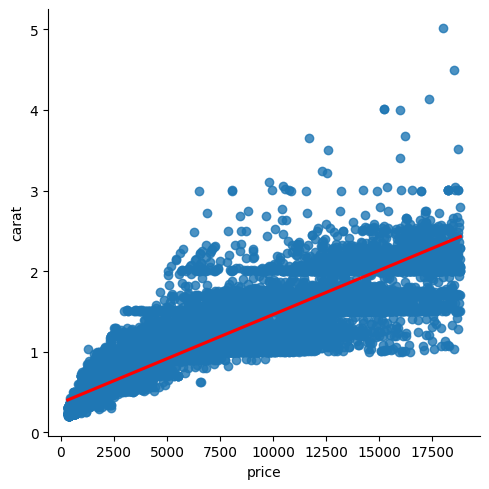

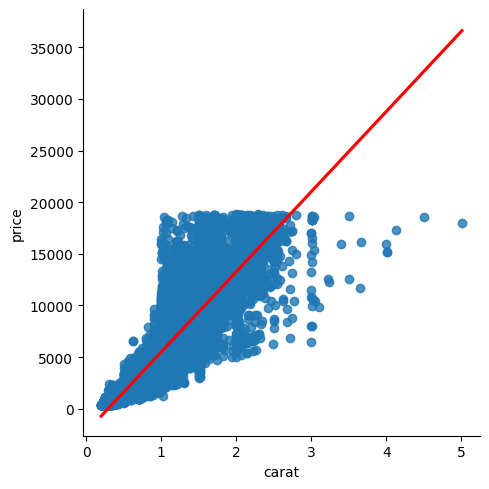

In [61]:
# makes two plots that show the regression model of price and carat
sns.lmplot(data=df, x="price", y="carat", line_kws={"color": "red"})
sns.lmplot(data=df, x="carat", y="price", line_kws={"color": "red"})

Decided to make two versions of the graph with swapped x,y values to help with the clarity of the visualisation. 
Notes from this is that it seems a linear model works for this dataset. There could be a more optimal model that is exponensial but as that is out of the scope of this class I will stick to the linear one. 
The visual also shows the max price of diamonds in the dataset around 20000 and that most diamonds in the dataset are below 3 carat with very few being above 3 carat considering the sample size of the dataset. 

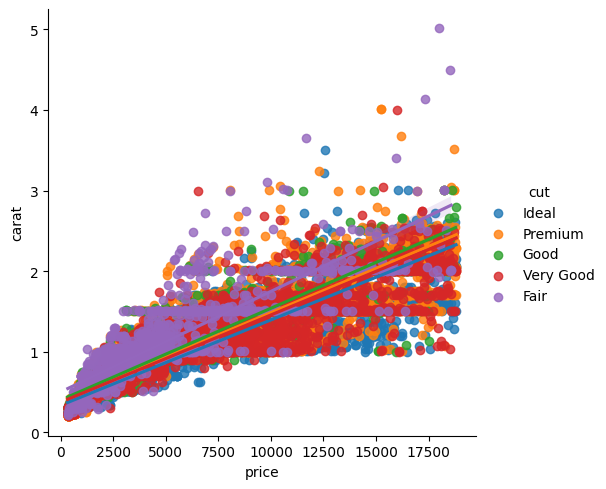

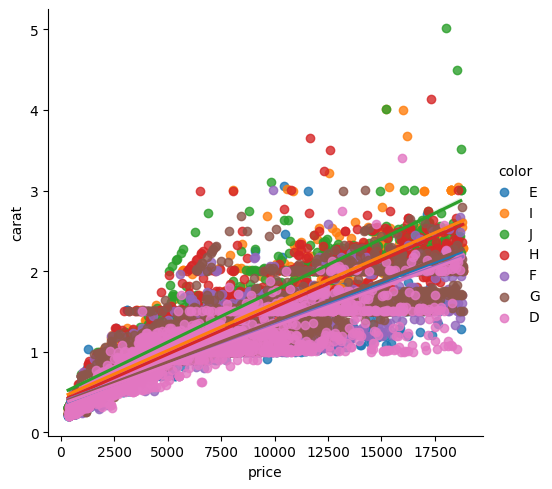

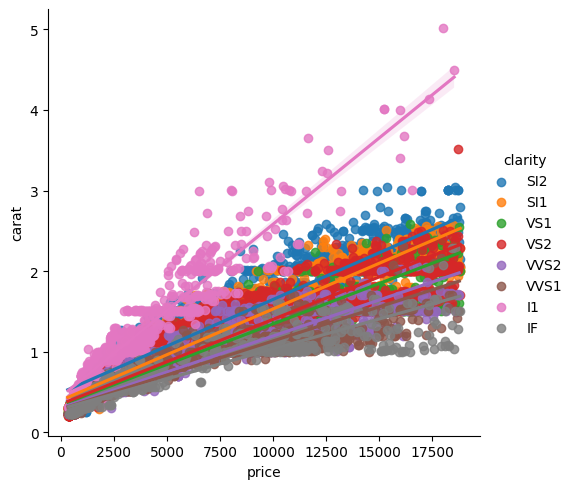

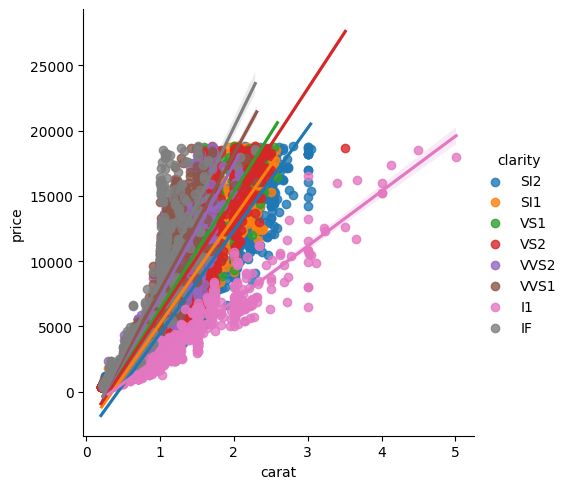

In [53]:
# plots regression model for price and carat factored by cut, color and clarity
sns.lmplot(data=df, x="price", y="carat", hue="cut")
sns.lmplot(data=df, x="price", y="carat", hue="color")
sns.lmplot(data=df, x="price", y="carat", hue="clarity")
sns.lmplot(data=df, x="carat", y="price", hue="clarity")

## tankar

alla värden maxar ut på 3 karat nästan bara diamanter med I1 clarity har högre än 3 på detta stora sample detta gör att

- dissusion om hurvida diamanter med en carat över 3 är en abnormalitet som förstör datasättet
- om pga detta så borde korrelation och predictions tester göras filtrerat på clarity också för att räkna med de med abnormalt hög karat
- göra ett hypotetstest för hurvida detta stämmer i populationen, är alla diamanter med 3+ karat I1
- skulle kunna vara att det inte går att få ut större diamanter utan att dom blir sämre i klarhet, vetenskaplig förklaring?


# Extra ide
gör ett hypotets test för om medelvärdet på I1 clarity diamanter skiljer sig från andra diamanter

alternativ hypotes medelvärde för I1 claritys carat är större än totala diamant medelvärde
nollhypotes medelvärdet för I1 clarity är samma eller mindre än totala diamant medelvärdet

TtestResult(statistic=20.914386528469134, pvalue=1.0, df=740)


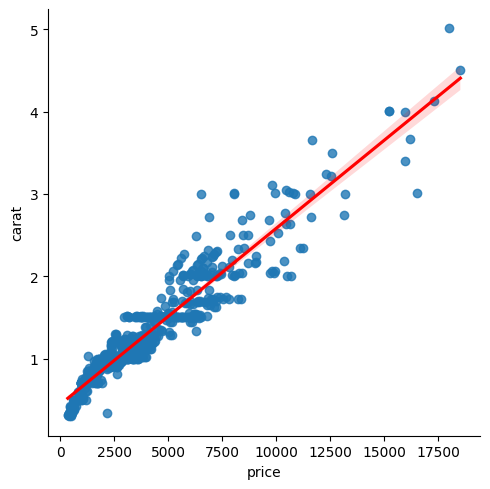

In [73]:
# makes a dataframe with only diamonds of certain clarity and then plots a regression model plot for it
df_clarity = df.query("clarity == 'I1'")
carat_clarity = df_clarity["carat"]

xbar = carat_clarity.mean()
mu = df["carat"].mean()

results = scs.ttest_1samp(a=carat_clarity, popmean=mu, alternative="less")
print(results)

sns.lmplot(data=df_clarity, x="price", y="carat", line_kws={"color" : "red"})

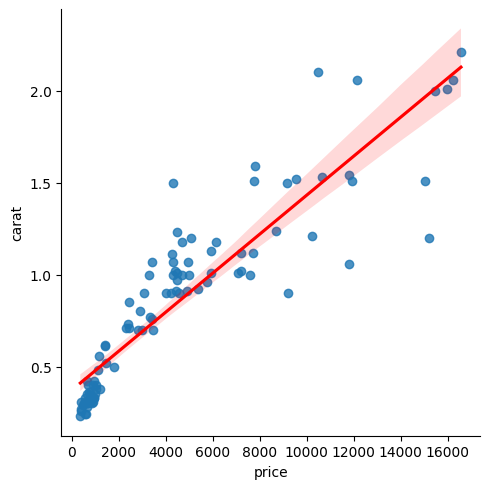

In [55]:
# pulls a sample from the dataset then plots a regression model plot from the sample
df_sample = df.sample(100)

sns.lmplot(data=df_sample, x="price", y="carat", line_kws={"color" : "red"})

Correlation test for a random sample from the dataset that gives a correlation statistic and also a p-value. The p-value is based on a hypothesis test with the null hypothesis that the distributions are uncorrelated and normally distributed. The p-value repressents the probablity that an uncorrelated system would produce similar correlation to the one here.
This means that a r-value close to 1 or -1 indicates high correlation and a low p-value shows that it is unlikely that the r-value would be a non or false correlation.

In [56]:
# gets a sample from the data and calculates the correlation coefficient between price and carat.
df_test = df.sample(100)
scs.pearsonr(df_test["price"], df_test["carat"])

PearsonRResult(statistic=0.9271825822075408, pvalue=1.4063596921449386e-43)

In [57]:
model = ols("price ~ carat", data=df_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     600.3
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.41e-43
Time:                        10:46:55   Log-Likelihood:                -877.38
No. Observations:                 100   AIC:                             1759.
Df Residuals:                      98   BIC:                             1764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2189.5016    312.375     -7.009      0.0

In [58]:
# creates a prediction model for carat with the confidence level 95% 
predictions = model.get_prediction(df_test["carat"])
frame = predictions.summary_frame(alpha=0.05)
ypred = frame["mean"]


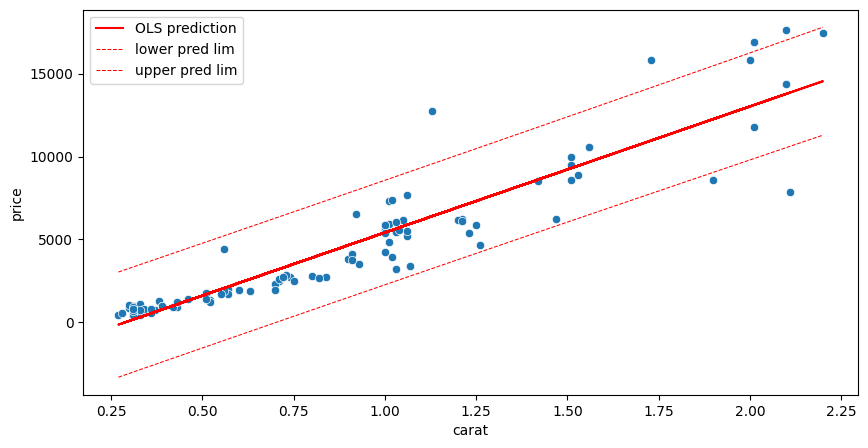

In [59]:
order = np.argsort(df_test["carat"])
xs = np.array(df_test["carat"])[order]
lower = np.array(frame["obs_ci_lower"])[order]
upper = np.array(frame["obs_ci_upper"])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=df_test, x="carat", y="price")
ax.plot(df_test["carat"], ypred, "r", label="OLS prediction")
ax.plot(xs, lower, "--r", label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, "--r", label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()